# **Setting up the environment**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# **Loading the Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Sample - Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [6]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.duplicated().sum()

np.int64(0)

Data is already Pre-processed. There are no null and duplicated values.

In [9]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# **Renaming the columns**

In [13]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

# **Exploring the Data(EDA)**

In [16]:
without_rowid_postalcode = df.drop(['row_id', 'postal_code'], axis=1)
without_rowid_postalcode.describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [17]:
print("Total Sales:", df['sales'].sum())
print("Total Profit:", df['profit'].sum())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


Total sales and Profits

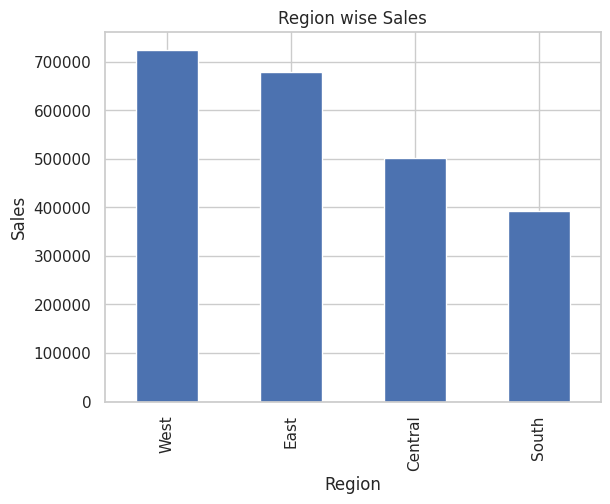

In [19]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Region wise Sales')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.show()

Seems west has highest sale.

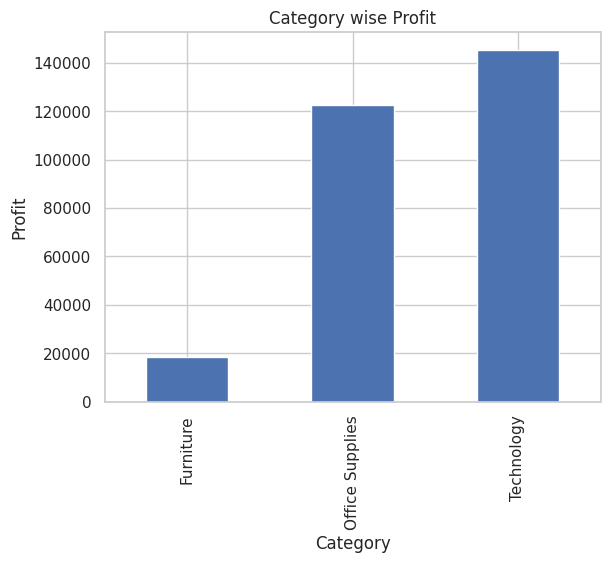

In [22]:
category_profit = df.groupby('category')['profit'].sum().sort_values()
category_profit.plot(kind='bar', title='Category wise Profit')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.show()

Seems Technology is the most profited field(Category)

# **Visualizations**

<Axes: >

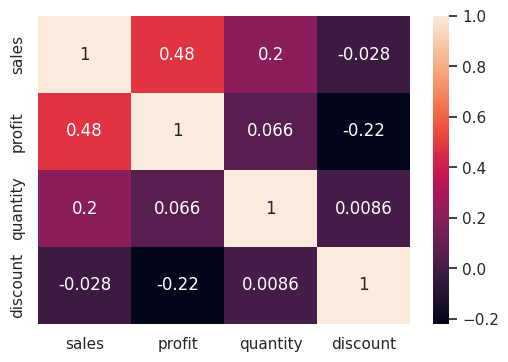

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['sales', 'profit', 'quantity', 'discount']].corr(), annot=True)

The heatmap shows correlation coefficients between pairs of features like sales, profit, quantity, and discount. Each value ranges from:

+1 = Perfect positive correlation (they increase together)

0 = No linear relationship

-1 = Perfect negative correlation (one increases, the other decreases)

<Axes: xlabel='sales', ylabel='profit'>

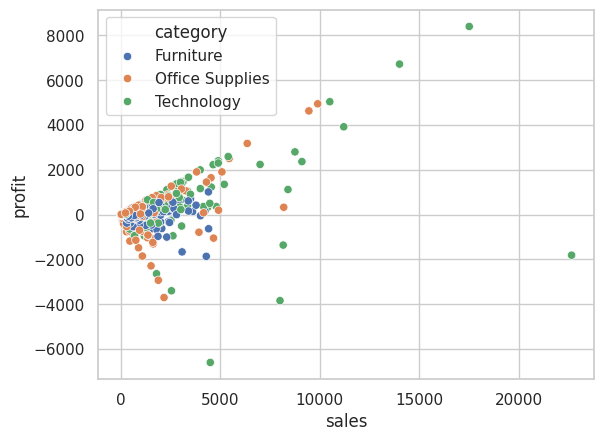

In [24]:
sns.scatterplot(data=df, x='sales', y='profit', hue='category')

Technology field has highest sales as well as profit.

<Axes: title={'center': 'Top 10 Sub-Categories by Sales'}, xlabel='sub-category'>

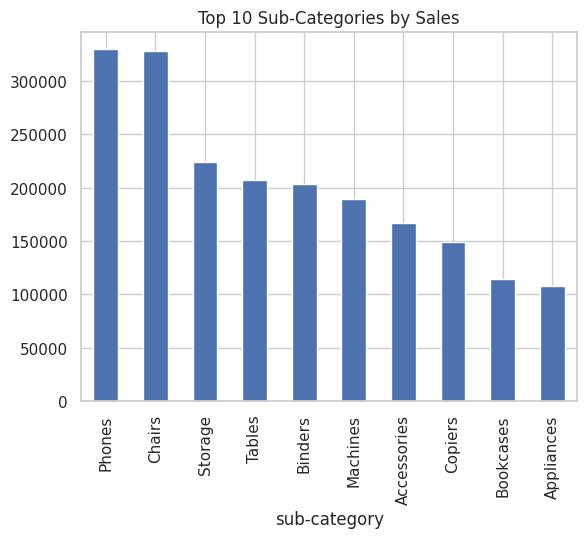

In [25]:
top_subcats = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False).head(10)
top_subcats.plot(kind='bar', title='Top 10 Sub-Categories by Sales')

Considering sub categories, Phones has highest sales.